In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19, ResNet50,InceptionV3

In [3]:
data_train_path = '/content/drive/MyDrive/training/training/train'
data_test_path = '/content/drive/MyDrive/training/training/test'
data_val_path = '/content/drive/MyDrive/training/training/val'

In [4]:
img_width = 256
img_height =256

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 14000 files belonging to 10 classes.


In [6]:
data_leaf = data_train.class_names
data_leaf

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 3000 files belonging to 10 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 3010 files belonging to 10 classes.


In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [10]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)  # Adjust the number of output units based on your classes


In [12]:
# Create the model
model_1 = Model(inputs=base_model.input, outputs=x)

# Compile the model

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Print model summary
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 31,497,546 (120.15 MB)

 Trainable params: 16,782,858 (64.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.15.0
Keras version: 2.15.0


In [ ]:
!pip install keras==<desired_version> tensorflow==<desired_version>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install keras==<desired_version> tensorflow==<desired_version>'


In [13]:
from tensorflow.keras.models import load_model

# Load the saved model
model_1 = load_model('/content/drive/MyDrive/training/vgg16_model.keras')

In [14]:
test_loss, test_accuracy = model_1.evaluate(data_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


95/95 ━━━━━━━━━━━━━━━━━━━━ 517s 5s/step - accuracy: 0.8743 - loss: 0.4764
Test Accuracy: 0.8797


In [ ]:
test_loss, test_accuracy = model_1.evaluate(data_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


95/95 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.8743 - loss: 0.4764
Test Accuracy: 0.8797


95/95 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step


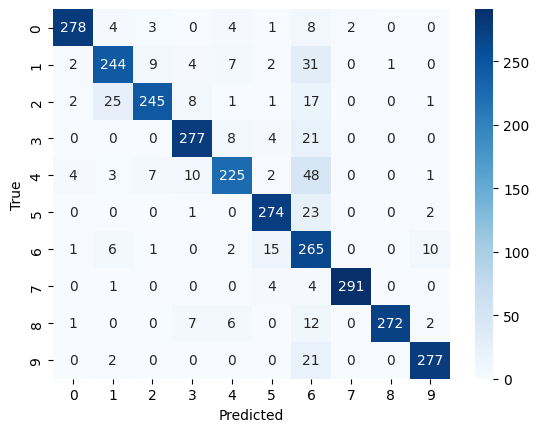

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.97      0.93      0.95       300
                        Tomato___Early_blight       0.86      0.81      0.83       300
                         Tomato___Late_blight       0.92      0.82      0.87       300
                           Tomato___Leaf_Mold       0.90      0.89      0.90       310
                  Tomato___Septoria_leaf_spot       0.89      0.75      0.81       300
Tomato___Spider_mites Two-spotted_spider_mite       0.90      0.91      0.91       300
                         Tomato___Target_Spot       0.59      0.88      0.71       300
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.97      0.98       300
                 Tomato___Tomato_mosaic_virus       1.00      0.91      0.95       300
                             Tomato___healthy       0.95      0.92      0.93       300

                                     accu

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Extract true labels from the dataset
y_true = []
for images, labels in data_test:
    y_true.extend(labels.numpy())

# Predict classes for test data
Y_pred = model_1.predict(data_test)
y_pred = np.argmax(Y_pred, axis=1)

# Convert y_true to a numpy array
y_true = np.array(y_true)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=data_test.class_names))



95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step


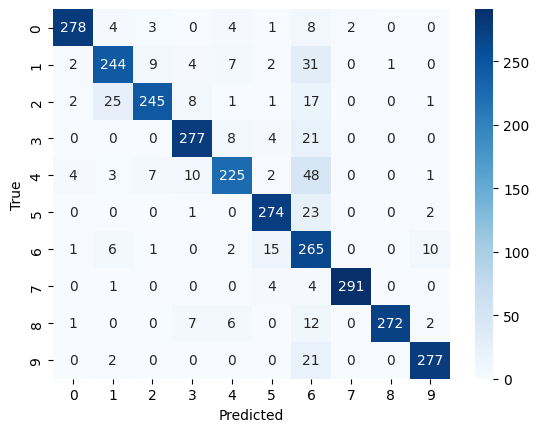

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.97      0.93      0.95       300
                        Tomato___Early_blight       0.86      0.81      0.83       300
                         Tomato___Late_blight       0.92      0.82      0.87       300
                           Tomato___Leaf_Mold       0.90      0.89      0.90       310
                  Tomato___Septoria_leaf_spot       0.89      0.75      0.81       300
Tomato___Spider_mites Two-spotted_spider_mite       0.90      0.91      0.91       300
                         Tomato___Target_Spot       0.59      0.88      0.71       300
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.97      0.98       300
                 Tomato___Tomato_mosaic_virus       1.00      0.91      0.95       300
                             Tomato___healthy       0.95      0.92      0.93       300

                                     accu

In [16]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Extract true labels from the dataset
y_true = []
for images, labels in data_test:
    y_true.extend(labels.numpy())

# Predict classes for test data
Y_pred = model_1.predict(data_test)
y_pred = np.argmax(Y_pred, axis=1)

# Convert y_true to a numpy array
y_true = np.array(y_true)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=data_test.class_names))



Classified by vgg16 model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


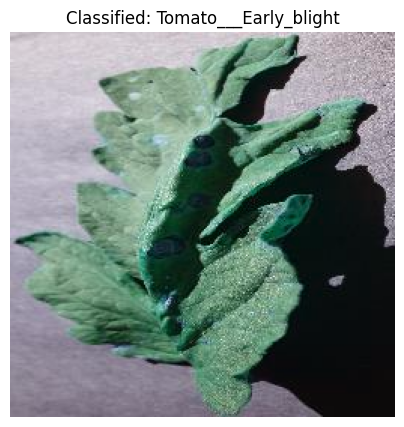

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def classify_and_display_image(model, img_path, target_size=(256, 256), class_labels=None):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model_1.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Convert image to displayable format
    img_display = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

    # Display the image with the predicted label
    plt.figure(figsize=(5, 5))
    plt.imshow(img_display)
    if class_labels:
        plt.title(f"Classified: {class_labels[predicted_class]}")
    else:
        plt.title(f"Classified: {predicted_class}")
    plt.axis('off')
    plt.show()

# Example usage
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Early_blight/45d27217-fbb3-4b74-93e7-d84f70b784f8___RS_Erly.B 7713.JPG'
class_names = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]


print("Classified by vgg16 model:")
classify_and_display_image(
    VGG16,  # Replace with the best model you determined
    img_path,
    class_labels=class_names
)

Classified by vgg16 model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step


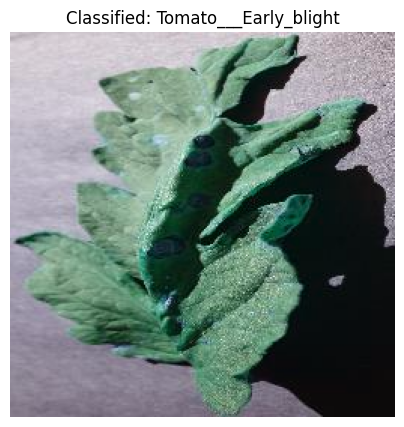

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def classify_and_display_image(model, img_path, target_size=(256, 256), class_labels=None):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model_1.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Convert image to displayable format
    img_display = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

    # Display the image with the predicted label
    plt.figure(figsize=(5, 5))
    plt.imshow(img_display)
    if class_labels:
        plt.title(f"Classified: {class_labels[predicted_class]}")
    else:
        plt.title(f"Classified: {predicted_class}")
    plt.axis('off')
    plt.show()

# Example usage
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Early_blight/45d27217-fbb3-4b74-93e7-d84f70b784f8___RS_Erly.B 7713.JPG'
class_names = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]


print("Classified by vgg16 model:")
classify_and_display_image(
    VGG16,  # Replace with the best model you determined
    img_path,
    class_labels=class_names
)

Classified by vgg16 model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step


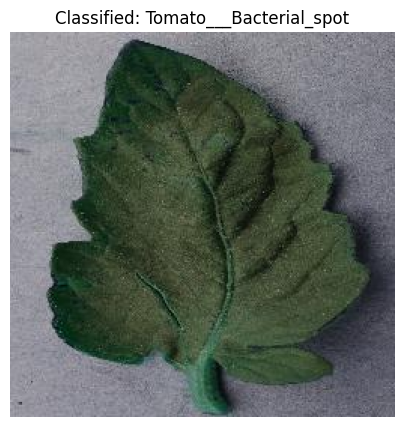

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def classify_and_display_image(model, img_path, target_size=(256, 256), class_labels=None):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model_1.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Convert image to displayable format
    img_display = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

    # Display the image with the predicted label
    plt.figure(figsize=(5, 5))
    plt.imshow(img_display)
    if class_labels:
        plt.title(f"Classified: {class_labels[predicted_class]}")
    else:
        plt.title(f"Classified: {predicted_class}")
    plt.axis('off')
    plt.show()

# Example usage
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Bacterial_spot/00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG'
class_names = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]


print("Classified by vgg16 model:")
classify_and_display_image(
    VGG16,  # Replace with the best model you determined
    img_path,
    class_labels=class_names
)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Early_blight/070679a9-27e1-4e6e-8072-29f3750d525b___RS_Erly.B 6439.JPG'

# Make prediction
predicted_class_index = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The classified class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
The classified class for the image is: Tomato___Early_blight


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Bacterial_spot/00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG'

# Make prediction
predicted_class_index = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The classified class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
The predicted class for the image is: Tomato___Bacterial_spot


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Early_blight/070679a9-27e1-4e6e-8072-29f3750d525b___RS_Erly.B 6439.JPG'

# Make prediction
predicted_class_index = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
The predicted class for the image is: Tomato___Early_blight


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Late_blight/08a94695-4566-49aa-84df-91980c3534a2___RS_Late.B 5396.JPG'

# Make prediction
predicted_class_index = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
The predicted class for the image is: Tomato___Late_blight


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Leaf_Mold/119da3be-8512-492e-ac10-66bee5e73a5c___Crnl_L.Mold 8770_flipTB.JPG'

# Make prediction
predicted_class_index = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
The predicted class for the image is: Tomato___Leaf_Mold


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Septoria_leaf_spot/0a146952-538a-41e5-a422-b5d50e91771e___Matt.S_CG 6079_flipTB.JPG'

# Make prediction
predicted_class_index = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
The predicted class for the image is: Tomato___Septoria_leaf_spot


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Spider_mites Two-spotted_spider_mite/4fc60427-ea10-4975-8ab9-f3b83aa362ea___Com.G_SpM_FL 1227.JPG'

# Make prediction
predicted_class_index = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
The predicted class for the image is: Tomato___Spider_mites Two-spotted_spider_mite


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Target_Spot/06deea79-68e2-4e28-b42d-0ef3a48b65fe___Com.G_TgS_FL 9819_180deg.JPG'

# Make prediction
predicted_class_index = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
The predicted class for the image is: Tomato___Target_Spot


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Tomato_Yellow_Leaf_Curl_Virus/29183200-002b-40e4-9dc1-cbe58eddc4b6___YLCV_NREC 2244.JPG'

# Make prediction
predicted_class_index = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
The predicted class for the image is: Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Tomato_mosaic_virus/16f91dc7-59a2-4cc3-b896-64e28bc60ced___PSU_CG 2108.JPG'

# Make prediction
predicted_class_index = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
The predicted class for the image is: Tomato___Tomato_mosaic_virus


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___healthy/0de16216-510d-48c1-9ef0-78ce39328ff2___GH_HL Leaf 240_flipTB.JPG'

# Make prediction
predicted_class_index = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
The predicted class for the image is: Tomato___healthy


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Tomato_Yellow_Leaf_Curl_Virus/214477ac-bed3-4818-9b35-6d9b72e9523d___YLCV_GCREC 1924.JPG'

# Make prediction
predicted_class_index = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
The predicted class for the image is: Tomato___Tomato_Yellow_Leaf_Curl_Virus


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


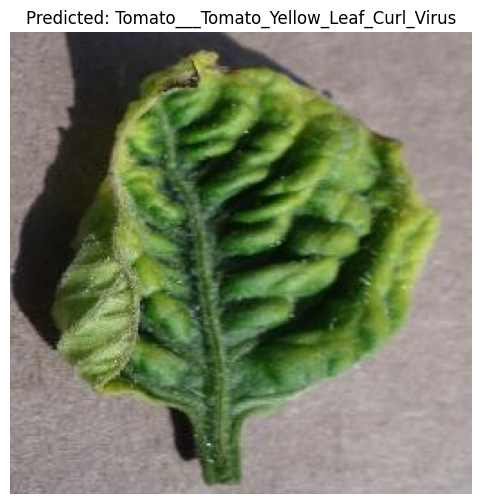

The predicted class for the image is: Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array, img

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array, img = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class, img

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Tomato_Yellow_Leaf_Curl_Virus/214477ac-bed3-4818-9b35-6d9b72e9523d___YLCV_GCREC 1924.JPG'

# Make prediction
predicted_class_index, img = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

# Display the image with the prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}')
plt.axis('off')
plt.show()

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


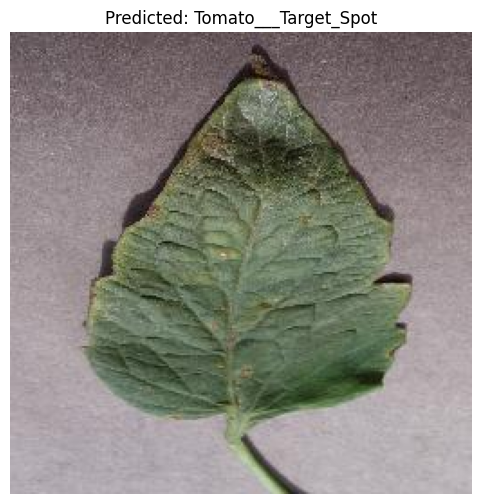

The predicted class for the image is: Tomato___Target_Spot


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array, img

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array, img = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class, img

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Target_Spot/01e0b8b1-e713-4c6d-973b-f7636280c58a___Com.G_TgS_FL 9816.JPG'

# Make prediction
predicted_class_index, img = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

# Display the image with the prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}')
plt.axis('off')
plt.show()

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


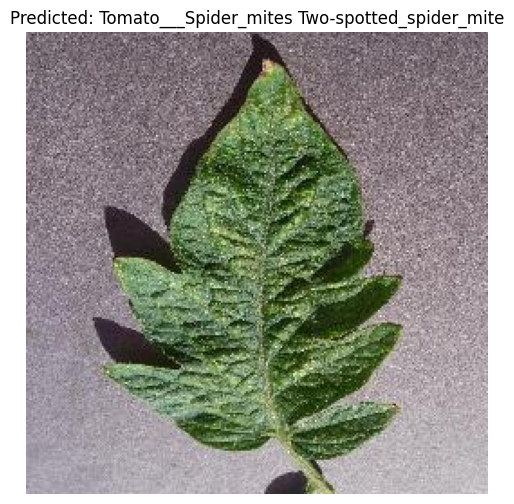

The predicted class for the image is: Tomato___Spider_mites Two-spotted_spider_mite


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array, img

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array, img = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class, img

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Spider_mites Two-spotted_spider_mite/333f0683-d52f-4bb8-a7ec-1c0f07164684___Com.G_SpM_FL 1147.JPG'

# Make prediction
predicted_class_index, img = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

# Display the image with the prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}')
plt.axis('off')
plt.show()

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


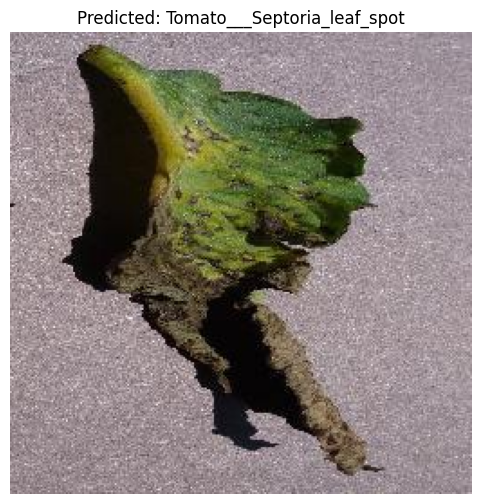

The predicted class for the image is: Tomato___Septoria_leaf_spot


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array, img

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array, img = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class, img

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Septoria_leaf_spot/0a5edec2-e297-4a25-86fc-78f03772c100___JR_Sept.L.S 8468_flipTB.JPG'

# Make prediction
predicted_class_index, img = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

# Display the image with the prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}')
plt.axis('off')
plt.show()

print(f'The predicted class for the image is: {predicted_class_label}')


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model_1, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = '/content/drive/MyDrive/training/training/test/Tomato___Tomato_mosaic_virus/2324b02b-1f9d-46a2-82f2-23856019d516___PSU_CG 2382_90deg.JPG'

# Make prediction
predicted_class_index = predict_image_class(model_1, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
The predicted class for the image is: Tomato___Tomato_mosaic_virus


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


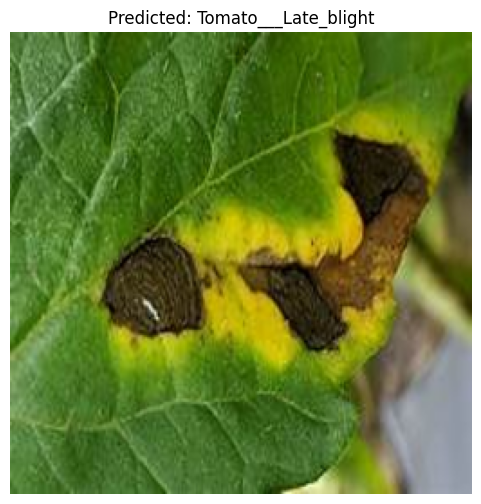

The predicted class for the image is: Tomato___Late_blight


In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Step 2: Download the image from the URL
def download_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# Step 3: Load and preprocess the image
def load_and_preprocess_image(img):
    img = img.resize((256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array, img

# Step 4: Predict the class of the new image
def predict_image_class(model_1, img_array):
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Step 1: Image URL
img_url = 'https://tse4.mm.bing.net/th?id=OIP.B2xHmdGO5aoB-qSYpYQ1qgHaE8&pid=Api&P=0&h=180'  # Replace with the actual image URL

# Download the image
img = download_image_from_url(img_url)

# Load and preprocess the image
img_array, img = load_and_preprocess_image(img)

# Make prediction
predicted_class_index = predict_image_class(model_1, img_array)
predicted_class_label = class_labels[predicted_class_index[0]]

# Display the image with the prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}')
plt.axis('off')
plt.show()

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


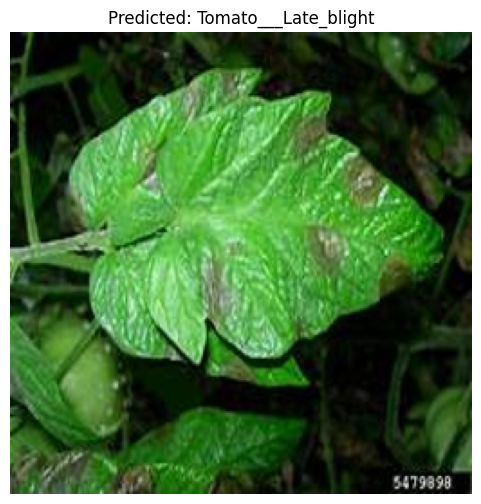

The predicted class for the image is: Tomato___Late_blight


In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Step 2: Download the image from the URL
def download_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# Step 3: Load and preprocess the image
def load_and_preprocess_image(img):
    img = img.resize((256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array, img

# Step 4: Predict the class of the new image
def predict_image_class(model_1, img_array):
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Step 1: Image URL
img_url = 'https://tse4.mm.bing.net/th?id=OIP.e7NyAOu-tc2amqTVD0nL2QHaFj&pid=Api&P=0&h=180'  # Replace with the actual image URL

# Download the image
img = download_image_from_url(img_url)

# Load and preprocess the image
img_array, img = load_and_preprocess_image(img)

# Make prediction
predicted_class_index = predict_image_class(model_1, img_array)
predicted_class_label = class_labels[predicted_class_index[0]]

# Display the image with the prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}')
plt.axis('off')
plt.show()

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


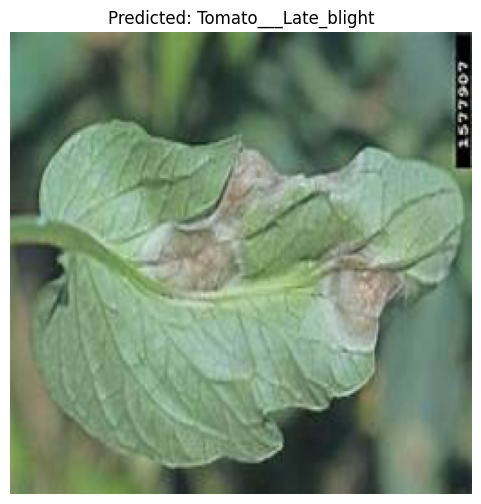

The predicted class for the image is: Tomato___Late_blight


In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Step 2: Download the image from the URL
def download_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# Step 3: Load and preprocess the image
def load_and_preprocess_image(img):
    img = img.resize((256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array, img

# Step 4: Predict the class of the new image
def predict_image_class(model_1, img_array):
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Step 1: Image URL
img_url = 'https://tse1.mm.bing.net/th?id=OIP.tXjjD_T5W-4L29quUmEgFQHaE8&pid=Api&P=0&h=180'  # Replace with the actual image URL

# Download the image
img = download_image_from_url(img_url)

# Load and preprocess the image
img_array, img = load_and_preprocess_image(img)

# Make prediction
predicted_class_index = predict_image_class(model_1, img_array)
predicted_class_label = class_labels[predicted_class_index[0]]

# Display the image with the prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}')
plt.axis('off')
plt.show()

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


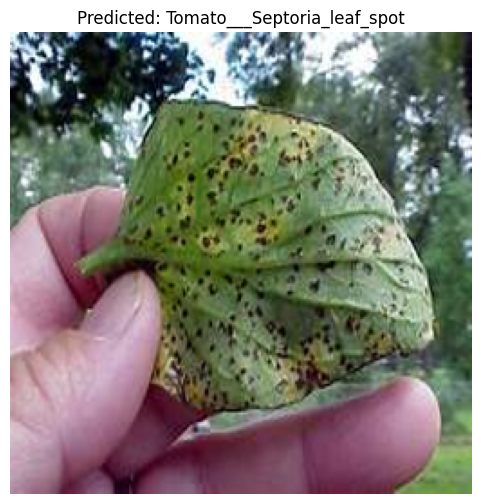

The predicted class for the image is: Tomato___Septoria_leaf_spot


In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Step 2: Download the image from the URL
def download_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# Step 3: Load and preprocess the image
def load_and_preprocess_image(img):
    img = img.resize((256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array, img

# Step 4: Predict the class of the new image
def predict_image_class(model_1, img_array):
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Step 1: Image URL
img_url = 'https://tse1.mm.bing.net/th?id=OIP.oo53UgKrA5yiphxn8EUIDQHaFj&pid=Api&P=0&h=180'  # Replace with the actual image URL

# Download the image
img = download_image_from_url(img_url)

# Load and preprocess the image
img_array, img = load_and_preprocess_image(img)

# Make prediction
predicted_class_index = predict_image_class(model_1, img_array)
predicted_class_label = class_labels[predicted_class_index[0]]

# Display the image with the prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}')
plt.axis('off')
plt.show()

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


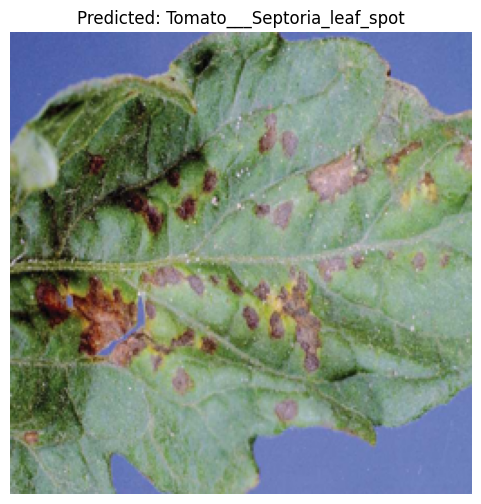

The predicted class for the image is: Tomato___Septoria_leaf_spot


In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Step 2: Download the image from the URL
def download_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# Step 3: Load and preprocess the image
def load_and_preprocess_image(img):
    img = img.resize((256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array, img

# Step 4: Predict the class of the new image
def predict_image_class(model_1, img_array):
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Step 1: Image URL
img_url = 'https://dsagrow.com/wp-content/uploads/2020/04/bacterial_spot_tomato-1.jpg'  # Replace with the actual image URL

# Download the image
img = download_image_from_url(img_url)

# Load and preprocess the image
img_array, img = load_and_preprocess_image(img)

# Make prediction
predicted_class_index = predict_image_class(model_1, img_array)
predicted_class_label = class_labels[predicted_class_index[0]]

# Display the image with the prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}')
plt.axis('off')
plt.show()

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


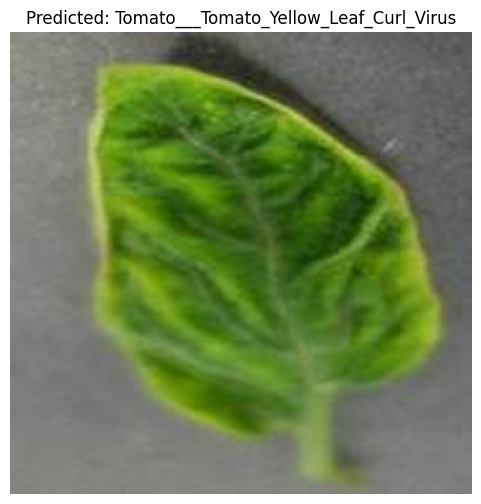

The predicted class for the image is: Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Step 2: Download the image from the URL
def download_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# Step 3: Load and preprocess the image
def load_and_preprocess_image(img):
    img = img.resize((256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array, img

# Step 4: Predict the class of the new image
def predict_image_class(model_1, img_array):
    predictions = model_1.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Step 1: Image URL
img_url = 'https://tse2.mm.bing.net/th?id=OIP.NpuXcZGiVFJP8VUi-_dNnQAAAA&pid=Api&P=0&h=180'  # Replace with the actual image URL

# Download the image
img = download_image_from_url(img_url)

# Load and preprocess the image
img_array, img = load_and_preprocess_image(img)

# Make prediction
predicted_class_index = predict_image_class(model_1, img_array)
predicted_class_label = class_labels[predicted_class_index[0]]

# Display the image with the prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}')
plt.axis('off')
plt.show()

print(f'The predicted class for the image is: {predicted_class_label}')
